In [ ]:
# Is there a correlation between the usage of certain distribution channels and successful bookings? Are there significant differences in cancellations? Which agents have the most success/are used the most?

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [64]:
hotel_csv = pd.read_csv("./Resources/hotel_bookings.csv")
agent_columns = ['distribution_channel', 'previous_cancellations', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'reservation_status']
agent_columns_df = hotel_csv[agent_columns]
agent_columns_df['agent'].fillna(0, inplace=True)
agent_columns_df['company'].fillna(0, inplace=True)
agent_columns_df.to_csv('agent_booking.csv', index=False)


C:\Users\sammy\AppData\Local\Temp\ipykernel_43524\3234497803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['agent'].fillna(0, inplace=True)
C:\Users\sammy\AppData\Local\Temp\ipykernel_43524\3234497803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['company'].fillna(0, inplace=True)


In [65]:
agent_csv = pd.read_csv("agent_booking.csv")
agent_csv['agent'] = agent_csv['agent'].astype(int)
agent_csv['company'] = agent_csv['company'].astype(int)
agent_csv.head(10)

,distribution_channel,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,reservation_status
0,Direct,0,3,0,0,0,Check-Out
1,Direct,0,4,0,0,0,Check-Out
2,Direct,0,0,0,0,0,Check-Out
3,Corporate,0,0,304,0,0,Check-Out
4,TA/TO,0,0,240,0,0,Check-Out
5,TA/TO,0,0,240,0,0,Check-Out
6,Direct,0,0,0,0,0,Check-Out
7,Direct,0,0,303,0,0,Check-Out
8,TA/TO,0,0,240,0,0,Canceled
9,TA/TO,0,0,15,0,0,Canceled


{9: 31961, 0: 16340, 240: 13922, 1: 7191, 14: 3640, 7: 3539, 6: 3290, 250: 2870, 241: 1721, 28: 1666, 8: 1514, 3: 1336, 37: 1230, 19: 1061, 40: 1039, 314: 927, 21: 875, 229: 786, 242: 780, 83: 696, 29: 683, 171: 607, 12: 578, 85: 554, 20: 540, 96: 537, 243: 514, 30: 484, 134: 482, 298: 472, 27: 450, 15: 402, 26: 401, 11: 395, 22: 382, 56: 375, 273: 349, 177: 347, 86: 338, 58: 335, 5: 330, 119: 304, 196: 301, 34: 294, 44: 292, 138: 287, 315: 284, 38: 274, 10: 260, 236: 247, 16: 246, 17: 241, 115: 225, 251: 220, 68: 211, 42: 211, 191: 198, 175: 195, 154: 193, 195: 193, 156: 190, 168: 184, 152: 183, 208: 173, 143: 172, 326: 165, 2: 162, 31: 162, 147: 156, 132: 143, 52: 137, 142: 137, 95: 135, 410: 133, 248: 131, 234: 128, 67: 127, 39: 127, 330: 125, 98: 124, 146: 124, 94: 114, 35: 109, 220: 104, 36: 100, 89: 99, 464: 98, 155: 94, 170: 93, 69: 90, 159: 89, 253: 87, 13: 82, 281: 82, 185: 78, 82: 77, 339: 77, 87: 77, 41: 75, 75: 73, 71: 73, 118: 69, 531: 68, 99: 68, 157: 61, 385: 60, 181: 59

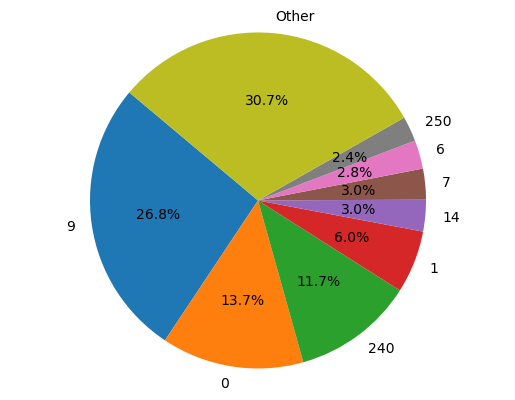

In [66]:

agent_value_counts = agent_csv['agent'].value_counts()
agent_dict = agent_value_counts.to_dict()
print(agent_dict)

# Shows the agents above 2% of the total and groups the rest into an 'Other' section
agent_threshold = 2
total_sum = sum(agent_dict.values())
agent_filtered = {key: value for key, value in agent_dict.items() if (value / total_sum) * 100 >= agent_threshold}
agent_filtered_sum = sum(agent_filtered.values())
agent_filtered['Other'] = total_sum - agent_filtered_sum


plt.pie(agent_filtered.values(), labels=agent_filtered.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [124]:
# consider guests that have checked out as a successful booking
successful_bookings = "Check-Out"
# consider guests that have canceled or no-showed as a failed booking
failed_bookings = "Canceled" or "No-Show"
# sets the agents that contributed to over 2% of the total bookings
agent_1 = 1
agent_9 = 9
agent_240 = 240
agent_14 = 14
agent_7 = 7
agent_6 = 6
agent_250 = 250
# agent 0 are the ones that used no agents
agent_0 = 0

# Gets a value_count of all the Agents that are above 2% of the total
agent_1_success = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == successful_bookings)]
agent_1_success_value_count = agent_1_success.shape[0]

print(f"Agent 1's Successes are {agent_1_success_value_count}")

agent_1_failure = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == failed_bookings)]
agent_1_failure_value_count = agent_1_failure.shape[0]

print(f"Agent 1's Failures are {agent_1_failure_value_count}")

agent_9_success = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == successful_bookings)]
agent_9_success_value_count = agent_9_success.shape[0]

print(f"Agent 9's Successes are {agent_9_success_value_count}")

agent_9_failure = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == failed_bookings)]
agent_9_failure_value_count = agent_9_failure.shape[0]

print(f"Agent 9's Failures are {agent_9_failure_value_count}")

agent_0_success = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == successful_bookings)]
agent_0_success_value_count = agent_0_success.shape[0]

print(f"Agent 0's Successes are {agent_0_success_value_count}")

agent_0_failure = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == failed_bookings)]
agent_0_failure_value_count = agent_0_failure.shape[0]

print(f"Agent 0's Failures are {agent_0_failure_value_count}")

agent_240_success = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == successful_bookings)]
agent_240_success_value_count = agent_240_success.shape[0]

print(f"Agent 240's Successes are {agent_240_success_value_count}")

agent_240_failure = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == failed_bookings)]
agent_240_failure_value_count = agent_240_failure.shape[0]

print(f"Agent 240's Failures are {agent_240_failure_value_count}")

agent_14_success = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == successful_bookings)]
agent_14_success_value_count = agent_14_success.shape[0]

print(f"Agent 14's Successes are {agent_14_success_value_count}")

agent_14_failure = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == failed_bookings)]
agent_14_failure_value_count = agent_14_failure.shape[0]

print(f"Agent 14's Failures are {agent_14_failure_value_count}")

agent_7_success = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == successful_bookings)]
agent_7_success_value_count = agent_7_success.shape[0]

print(f"Agent 7's Successes are {agent_7_success_value_count}")

agent_7_failure = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == failed_bookings)]
agent_7_failure_value_count = agent_7_failure.shape[0]

print(f"Agent 7's Failures are {agent_7_failure_value_count}")

agent_6_success = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == successful_bookings)]
agent_6_success_value_count = agent_6_success.shape[0]

print(f"Agent 6's Successes are {agent_6_success_value_count}")

agent_6_failure = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == failed_bookings)]
agent_6_failure_value_count = agent_6_failure.shape[0]

print(f"Agent 6's Failures are {agent_6_failure_value_count}")

agent_250_success = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == successful_bookings)]
agent_250_success_value_count = agent_250_success.shape[0]

print(f"Agent 250's Successes are {agent_250_success_value_count}")

agent_250_failure = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == failed_bookings)]
agent_250_failure_value_count = agent_250_failure.shape[0]

print(f"Agent 250's Failures are {agent_250_failure_value_count}")

other_agents_df_success = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_0, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == successful_bookings)]
other_agents_success_value_count = other_agents_df_success.shape[0]

print(f"Other Agent's Successes are {other_agents_success_value_count}")

# Gets a value_count of all the other Agents

other_agents_df_failure = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_0, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == failed_bookings)]
other_agents_failure_value_count = other_agents_df_failure.shape[0]

print(f"Other Agent's Failures are {other_agents_failure_value_count}")


Agent 1's Successes are 1911
Agent 1's Failures are 5280
Agent 9's Successes are 18697
Agent 9's Failures are 12891
Agent 0's Successes are 12310
Agent 0's Failures are 3826
Agent 240's Successes are 8438
Agent 240's Failures are 5383
Agent 14's Successes are 2988
Agent 14's Failures are 566
Agent 7's Successes are 3065
Agent 7's Failures are 446
Agent 6's Successes are 2265
Agent 6's Failures are 1017
Agent 250's Successes are 2357
Agent 250's Failures are 481
Other Agent's Successes are 41832
Other Agent's Failures are 26018


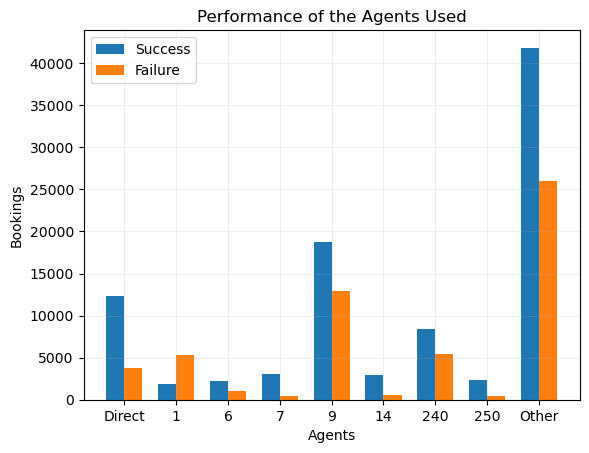

In [178]:
# Makes a dictionary from the previously obtained value counts
agent_success_dict = {'Direct':agent_0_success_value_count, '1':agent_1_success_value_count, '6':agent_6_success_value_count, '7':agent_7_success_value_count,
                      '9':agent_9_success_value_count, '14':agent_14_success_value_count, '240':agent_240_success_value_count, '250':agent_250_success_value_count,
                      'Other':other_agents_success_value_count}
agent_failure_dict = {'Direct':agent_0_failure_value_count, '1':agent_1_failure_value_count, '6':agent_6_failure_value_count, '7':agent_7_failure_value_count,
                      '9':agent_9_failure_value_count, '14':agent_14_failure_value_count, '240':agent_240_failure_value_count, '250':agent_250_failure_value_count,
                      'Other':other_agents_failure_value_count}

# Gets the X and Y values for the successful bookings to use in the chart
agent_success_keys = agent_success_dict.keys()
agent_success_values = agent_success_dict.values()

# Gets the X and Y values for the failed bookings to use in the chart
agent_failure_keys = agent_failure_dict.keys()
agent_failure_values = agent_failure_dict.values()

# Plotting the data on a bar graph
agent_x_axis = np.arange(len(agent_success_keys))
bar_width = 0.35
agent_tick_locations = [value for value in agent_x_axis]

plt.xticks(agent_tick_locations, agent_success_keys)
plt.bar(agent_x_axis - bar_width/2, agent_success_values, bar_width, label='Success')
plt.bar(agent_x_axis + bar_width/2, agent_failure_values, bar_width, label='Failure')
plt.legend()
plt.xlabel('Agents')
plt.ylabel('Bookings')
plt.title('Performance of the Agents Used')
plt.grid(alpha=0.2)
plt.show()

{'TA/TO': 97870, 'Direct': 14645, 'Corporate': 6677, 'GDS': 193, 'Undefined': 5}
dict_values([97870, 14645, 6677, 193, 5])


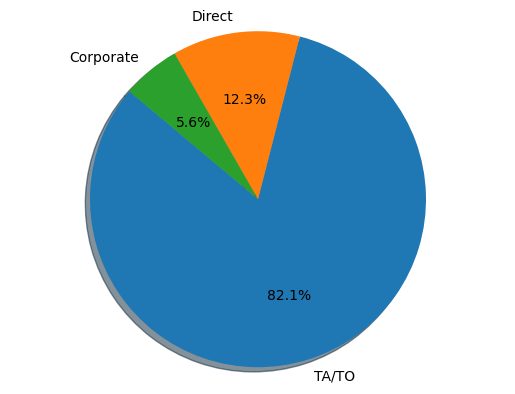

In [174]:
dchannel_value_counts = agent_csv['distribution_channel'].value_counts()
dchannel_dict = dchannel_value_counts.to_dict()
print(dchannel_dict)

dchannel_keys = dchannel_dict.keys()
dchannel_values = dchannel_dict.values()
print(dchannel_values)

# Filtering out the less than 1% of insignificant data
dchannel_threshold = 5
total_dchannel_sum = sum(dchannel_values)
filtered_dchannel_values = [value for value in dchannel_values if (value / total_dchannel_sum) * 100 >= dchannel_threshold]
filtered_labels = [label for value, label in zip(dchannel_values, dchannel_keys) if (value / total_dchannel_sum) * 100 >= dchannel_threshold]

plt.pie(filtered_dchannel_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.show()